In [1]:
import pandas as pd 
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Mushroom%20Classification/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df.loc[df.loc[:,'class'] == 'e']['bruises'],
    histfunc = "count",
    name='Edible',
    marker_color='#EB89B5',
))
fig.add_trace(go.Histogram(
    x=df.loc[df.loc[:,'class'] == 'p']['bruises'],
    histfunc = "count",
    name='Posionous',
    marker_color='#330C73',
))
fig.update_layout(
    title_text='Histogram of Bruises with Class',
    xaxis_title_text='Value',
    yaxis_title_text='Count',
)
fig.show()

In [5]:
df['class'] = df['class'].map({'p': 1, 'e': 0})
class_by_population = df.groupby(['population'])['class'].value_counts(normalize=True).unstack()
class_by_population = class_by_population.sort_values(by=1, ascending=False)
fig = go.Figure(data=[
    go.Bar(name='Poisonous', x=class_by_population.index, y=class_by_population[1]),
    go.Bar(name='Edible', x=class_by_population.index, y=class_by_population[0])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [6]:
class_by_habitat = df.groupby(['habitat'])['class'].value_counts(normalize=True).unstack()
class_by_habitat = class_by_habitat.sort_values(by=1, ascending=False)
fig = go.Figure(data=[
    go.Bar(name='Poisonous', x=class_by_habitat.index, y=class_by_habitat[1]),
    go.Bar(name='Edible', x=class_by_habitat.index, y=class_by_habitat[0])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [7]:
y = df.loc[:,'class'].values
X = df.drop(['class'], axis=1)

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
X = encoder.fit_transform(X)
X.shape

(8124, 95)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True)

In [10]:
from tensorflow import keras

In [11]:
from functools import partial

MyDense = partial(keras.layers.Dense,
                 activation="selu",
                 kernel_initializer="lecun_normal")

In [12]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = MyDense(20)(input_layer)
hidden2 = MyDense(10)(hidden1)
dropout = keras.layers.Dropout(rate=0.2)(hidden2)
output = MyDense(1, activation="sigmoid", kernel_initializer="uniform")(dropout)

model = keras.models.Model(inputs=[input_layer], outputs=[output])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler_cb = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
184/184 [==============================] - 2s 5ms/step - loss: 0.4960 - accuracy: 0.8169 - val_loss: 0.0706 - val_accuracy: 0.9768
Epoch 2/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9886 - val_loss: 0.0226 - val_accuracy: 0.9952
Epoch 3/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9971 - val_loss: 0.0100 - val_accuracy: 0.9981
Epoch 4/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 5/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.0027 - val_accuracy: 0.9990
Epoch 6/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 

In [14]:
 model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 1ms/step - loss: 3.3372e-07 - accuracy: 1.0000


[3.337231930800044e-07, 1.0]

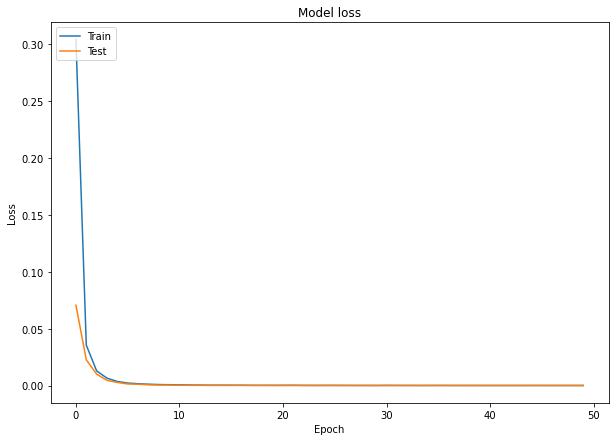

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()